In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import mnist 

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## Data cleaning

In [21]:
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

pixel of img - 28 X 28


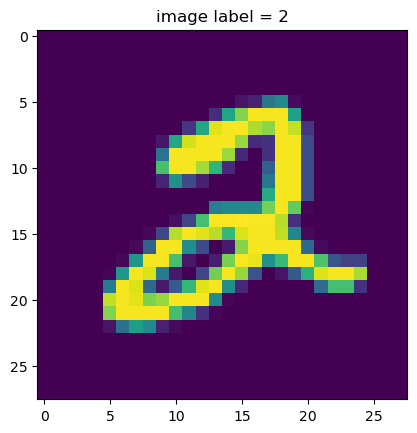

In [10]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
print(f"pixel of img - 28 X 28")
plt.show()

In [14]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Neutal Network Model

In [11]:
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [12]:
model = Sequential([ # all input ,, hidden layer and output layer are in a one sequence
    Flatten(input_shape = (28,28)), # convert 2D into 1D matrix or input layer
    Dense(5,activation = 'relu'), # use when feed neural network or Fully connected neural network or Hidden Layer having 5 neurons
    Dense(10,activation = 'softmax') # output layer having 10 neurons
])

C:\Users\gupta\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Input Layer (Flatten) -> [784] 
#         │
#         ▼
# Dense Layer (Dense) -> [5] (3,925 params) have bias also
#         │
#         ▼
# Dense Layer (Dense_1) -> [10] (60 params) have bias also
#         │
#         ▼
# Output Layer -> [10]


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.fit(x_train,y_train,epochs = 5 , batch_size = 32 , verbose = 2)
# epochs no of iterations on my data
# batch_size in a single batch take n input to do backpropagation
# verbose how much info you show on output

Epoch 1/5
1875/1875 - 3s - 2ms/step - accuracy: 0.2967 - loss: 2.0679
Epoch 2/5
1875/1875 - 2s - 1ms/step - accuracy: 0.5297 - loss: 1.5374
Epoch 3/5
1875/1875 - 2s - 1ms/step - accuracy: 0.6288 - loss: 1.2300
Epoch 4/5
1875/1875 - 2s - 1ms/step - accuracy: 0.6734 - loss: 1.0508
Epoch 5/5
1875/1875 - 2s - 1ms/step - accuracy: 0.7012 - loss: 0.9378


In [22]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1044 - loss: 2.8032


[2.8365180492401123, 0.0982000008225441]

In [24]:
model.save('mnist.h5')

In [25]:
model.get_weights()

[array([[ 0.07876958,  0.00237135,  0.03809729,  0.01891536, -0.04364919],
        [ 0.0233744 ,  0.03598603,  0.00829465, -0.04289494, -0.03313582],
        [-0.06386122, -0.06646154,  0.01613139, -0.04998163,  0.00290221],
        ...,
        [ 0.05215457, -0.08544272,  0.06294695,  0.02270599, -0.00691098],
        [ 0.06158227,  0.05661398, -0.08556728, -0.02998039, -0.05121868],
        [ 0.08463824,  0.03394467, -0.06903207, -0.08649388,  0.01246827]],
       dtype=float32),
 array([ 0.32370657,  0.64962816,  0.38048372, -0.00782774,  0.72095037],
       dtype=float32),
 array([[ 2.8615682 , -0.6606331 ,  0.64881456,  3.9760644 , -8.190593  ,
          1.0516324 , -1.5355902 , -4.34811   ,  0.79102826, -4.894111  ],
        [-7.1012015 ,  2.6515622 ,  0.02467181, -0.8483836 ,  2.4920106 ,
         -3.675943  ,  4.148703  , -2.5465806 , -3.1776993 ,  1.5185993 ],
        [ 1.6628349 , -0.6022779 ,  3.2431166 , -2.6511006 , -0.88817203,
          0.93439305,  1.7451023 , -6.301841